In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




In [2]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

df.head()

df.shape


(253680, 22)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
#BUSQUEDA Y ELIMINACION DEDUPLICADOS#

duplicates = df.duplicated().sum()
duplicates



np.int64(24206)

In [5]:
df = df.drop_duplicates()


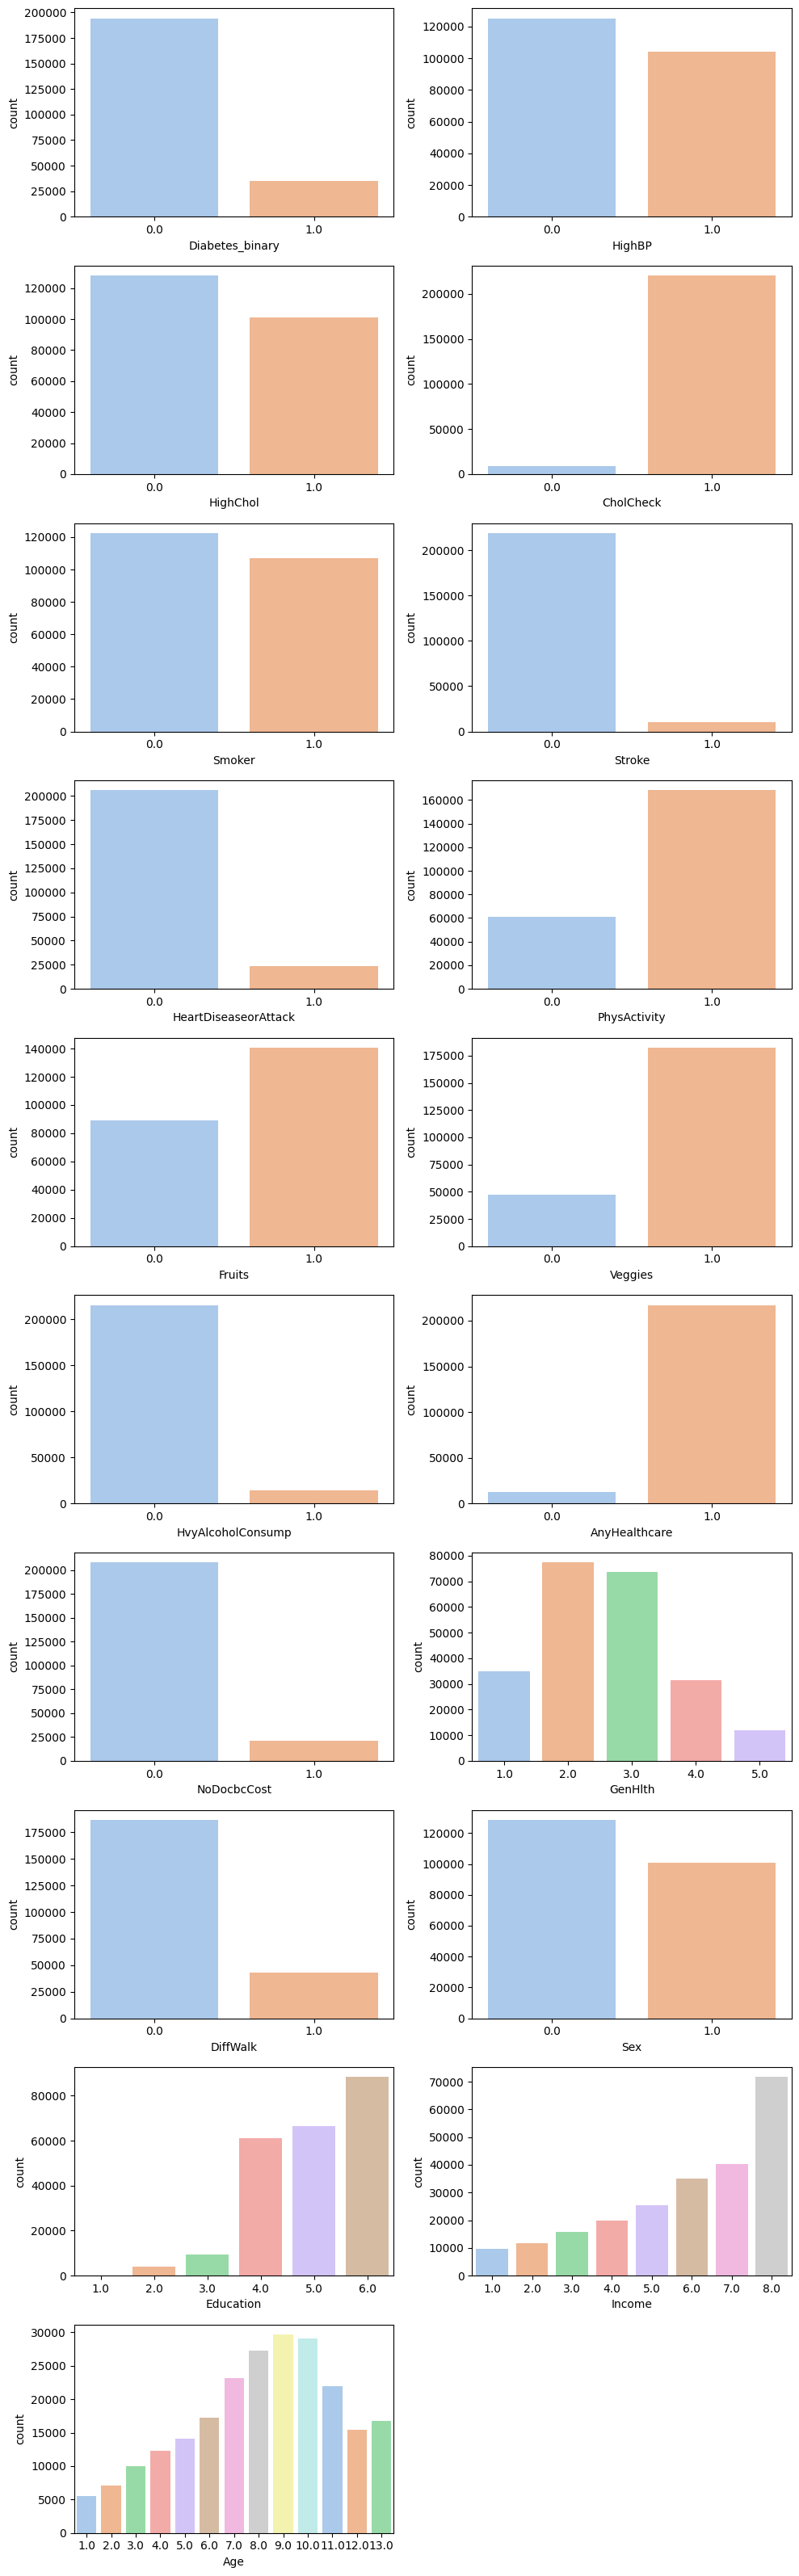

In [6]:
#ANALISIS DE VARIABLES CATEGORICAS#

## ["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", 
# "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Education", "Income", "Age"]#

fig, axis = plt.subplots(10, 2, figsize = (10, 32))

sns.countplot(ax = axis[0, 0], data = df, x = "Diabetes_binary", palette='pastel', hue= "Diabetes_binary", legend=False)
sns.countplot(ax = axis[0, 1], data = df, x = "HighBP", palette='pastel', hue= "HighBP", legend=False)
sns.countplot(ax = axis[1, 0], data = df, x = "HighChol", palette='pastel', hue= "HighChol", legend=False)
sns.countplot(ax = axis[1, 1], data = df, x = "CholCheck", palette='pastel', hue= "CholCheck", legend=False)
sns.countplot(ax = axis[2, 0], data = df, x = "Smoker", palette='pastel', hue= "Smoker", legend=False)
sns.countplot(ax = axis[2, 1], data = df, x = "Stroke", palette='pastel', hue= "Stroke", legend=False)
sns.countplot(ax = axis[3, 0], data = df, x = "HeartDiseaseorAttack", palette='pastel', hue= "HeartDiseaseorAttack", legend=False)
sns.countplot(ax = axis[3, 1], data = df, x = "PhysActivity", palette='pastel', hue= "PhysActivity", legend=False)
sns.countplot(ax = axis[4, 0], data = df, x = "Fruits", palette='pastel', hue= "Fruits", legend=False)
sns.countplot(ax = axis[4, 1], data = df, x = "Veggies", palette='pastel', hue= "Veggies", legend=False)
sns.countplot(ax = axis[5, 0], data = df, x = "HvyAlcoholConsump", palette='pastel', hue= "HvyAlcoholConsump", legend=False)
sns.countplot(ax = axis[5, 1], data = df, x = "AnyHealthcare", palette='pastel', hue= "AnyHealthcare", legend=False)
sns.countplot(ax = axis[6, 0], data = df, x = "NoDocbcCost", palette='pastel', hue= "NoDocbcCost", legend=False)
sns.countplot(ax = axis[6, 1], data = df, x = "GenHlth", palette='pastel', hue= "GenHlth", legend=False)
sns.countplot(ax = axis[7, 0], data = df, x = "DiffWalk", palette='pastel', hue= "DiffWalk", legend=False)
sns.countplot(ax = axis[7, 1], data = df, x = "Sex", palette='pastel', hue= "Sex", legend=False)
sns.countplot(ax = axis[8, 0], data = df, x = "Education", palette='pastel', hue= "Education", legend=False)
sns.countplot(ax = axis[8, 1], data = df, x = "Income", palette='pastel', hue= "Income", legend=False)
sns.countplot(ax = axis[9, 0], data = df, x = "Age", palette='pastel', hue= "Age", legend=False)

# Delete axis
axis[9, 1].axis("off")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

In [7]:
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


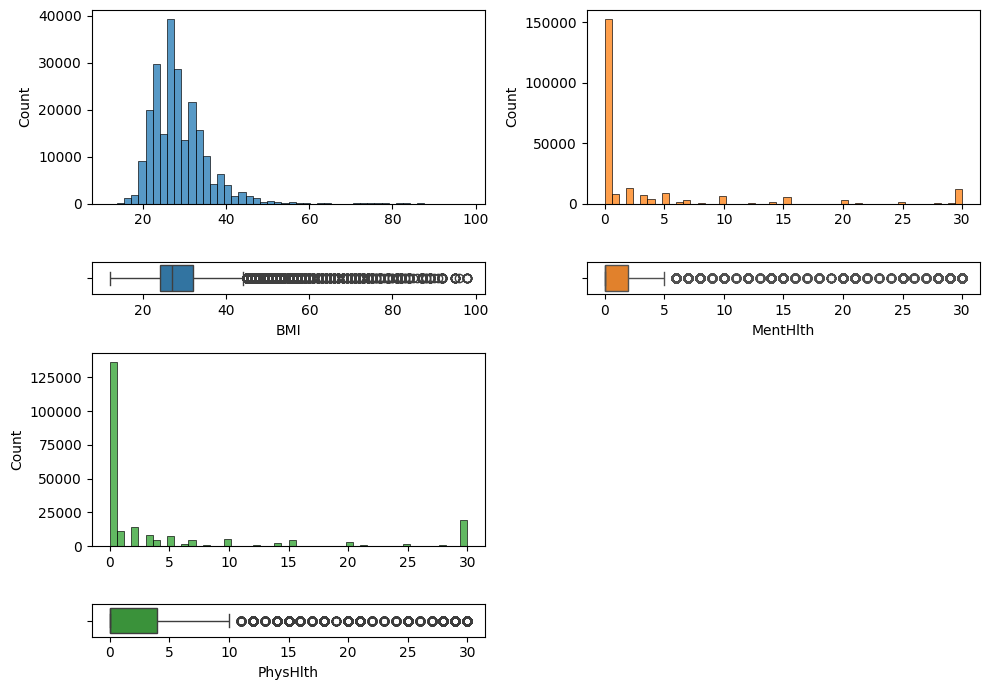

In [8]:
#ANALISIS DE VARIABLES NUMERICAS#

# ["BMI", "MentHlth", "PhysHlth",]
fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "BMI", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "BMI", color="#1f77b4").set(xlabel = "BMI")

sns.histplot(ax = axis[0, 1], data = df, x = "MentHlth", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "MentHlth", color="#ff7f0e").set(xlabel = "MentHlth")

sns.histplot(ax = axis[2, 0], data = df, x = "PhysHlth", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "PhysHlth", color="#2ca02c").set(xlabel = "PhysHlth")

# Delete axis
axis[2, 1].axis("off")
axis[3, 1].axis("off")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()


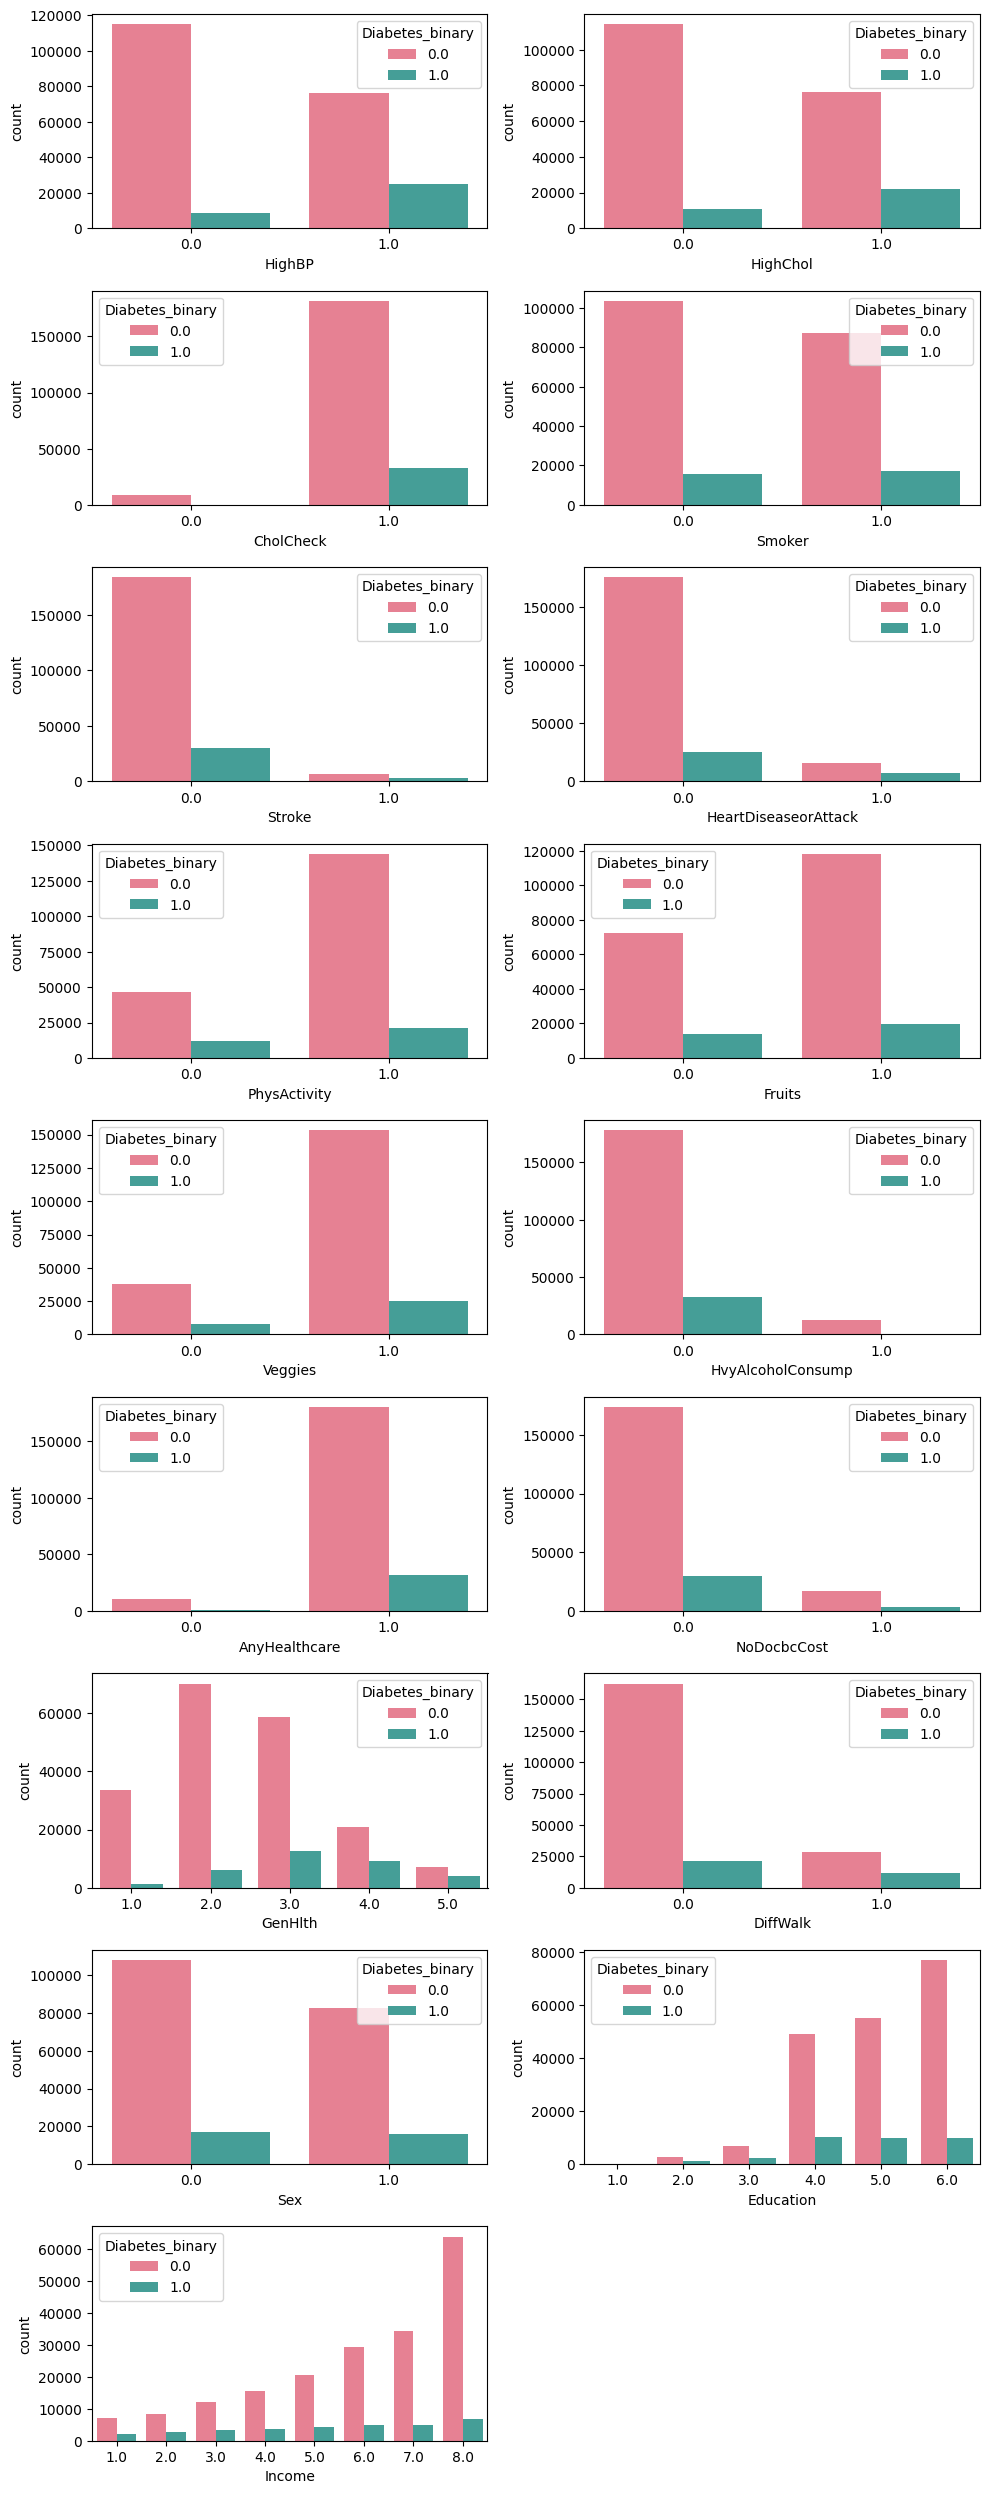

In [18]:
#ANALISIS DE VARIABLES CATEGORICAS#

fig, axis = plt.subplots(9, 2, figsize = (10, 25))

sns.countplot(ax = axis[0, 0], data = df, x = "HighBP", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[0, 1], data = df, x = "HighChol", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[1, 0], data = df, x = "CholCheck", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[1, 1], data = df, x = "Smoker", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[2, 0], data = df, x = "Stroke", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[2, 1], data = df, x = "HeartDiseaseorAttack", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[3, 0], data = df, x = "PhysActivity", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[3, 1], data = df, x = "Fruits", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[4, 0], data = df, x = "Veggies", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[4, 1], data = df, x = "HvyAlcoholConsump", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[5, 0], data = df, x = "AnyHealthcare", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[5, 1], data = df, x = "NoDocbcCost", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[6, 0], data = df, x = "GenHlth", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[6, 1], data = df, x = "DiffWalk", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[7, 0], data = df, x = "Sex", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[7, 1], data = df, x = "Education", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[8, 0], data = df, x = "Income", palette='husl', hue= "Diabetes_binary", legend=True)

# Delete axis
axis[8, 1].axis("off")


# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()


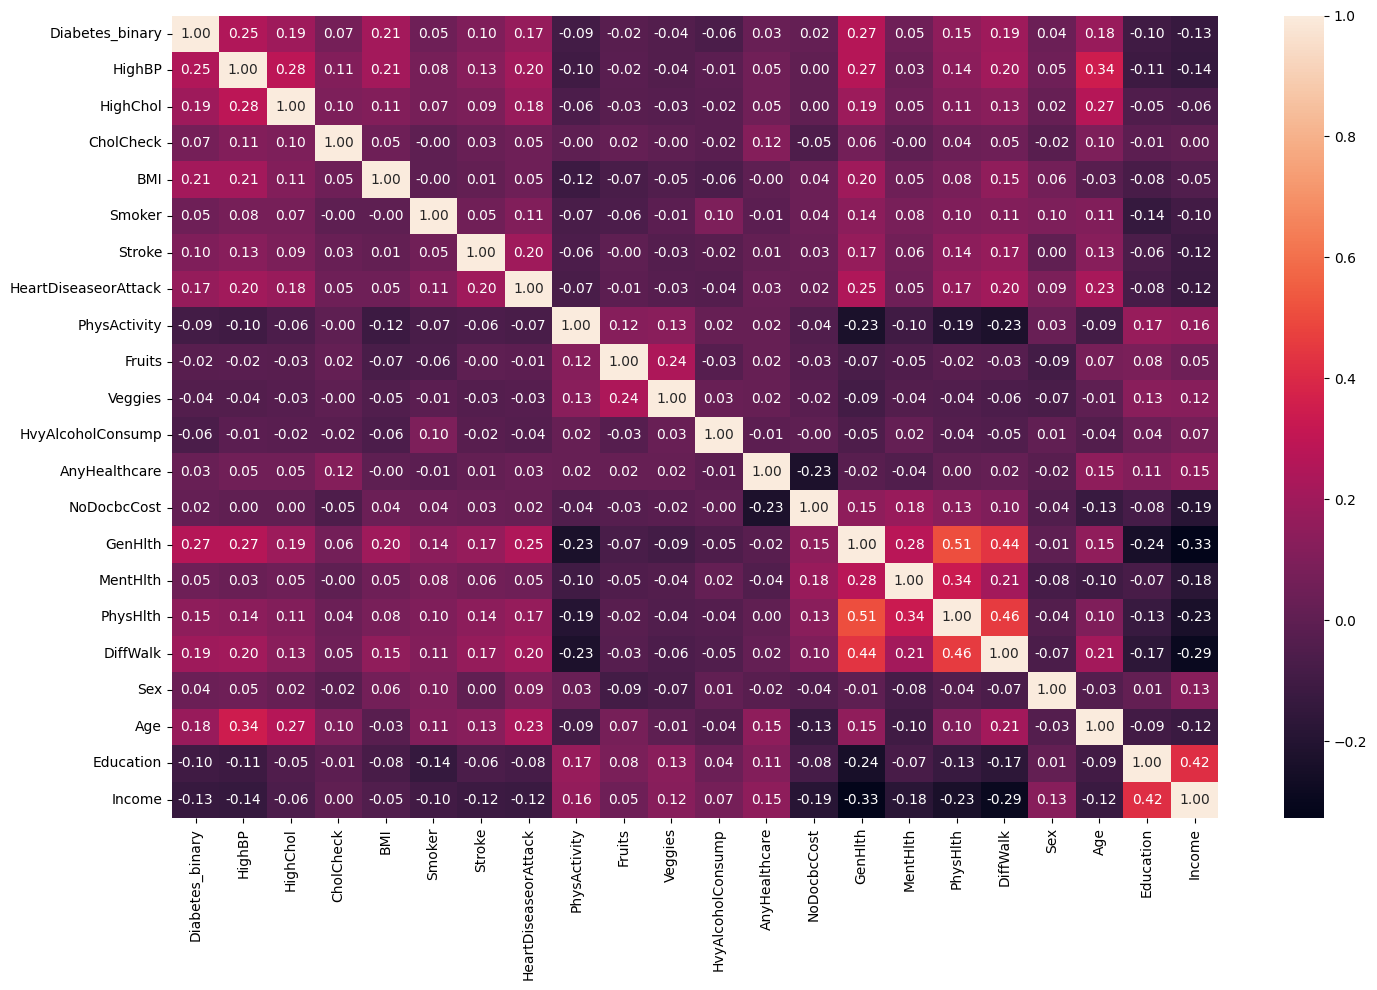

In [19]:
# Complete Numerical - Categorical Analysis

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap(df.corr(), annot = True, fmt = ".2f")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()


In [20]:
df.isnull().sum().sort_values(ascending=False)


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [21]:
# Splitting data into train and test sets
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
#Scaling
# Instantiate the scaler
scaler = MinMaxScaler().fit(X_train)
# Transformation and conversion to dataframe of scaled data
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


In [23]:
# ML Models
model = XGBClassifier(n_estimators=100, scale_pos_weight=6)
# Training
model.fit(X_train_scaled, y_train)
# Predict
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

Accuracy Test:  0.7043200500357398
F1 score Test:  0.4354501642001109
Precision Test:  0.30285951589938304
Recall Test:  0.7745410408132302
Accuracy Train:  0.7215638751759108
F1 score Train:  0.46919547327293437
Precision Train:  0.3268417852004568
Recall Train:  0.8312334967936628


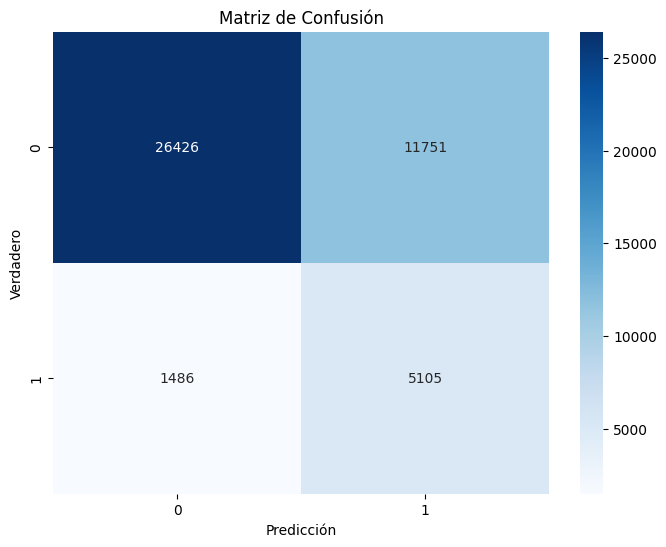

In [24]:
# Metrics
# Classification
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Graph the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()
